<a href="https://colab.research.google.com/github/HBSAIKAT/Railway-Accident-Severity-Prediction/blob/main/acdt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [7]:

df = pd.read_excel("acdt.xlsx")


In [8]:
print(df.shape)
df.head()

(185, 14)


,Serial,Date,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,Cause,Error By,Injured,Casuality
0,1.0,2020-01-06,Kurigram,NaN,NaN,Point Bursting,422 Down,Passenger,NaN,NaN,Negligence,Human,NaN,NaN
1,2.0,2020-01-11,Bohorpur,NaN,NaN,Derailment,8 Down,Passenger,NaN,NaN,Defective Component,Mechanical,NaN,NaN
2,3.0,2020-01-19,Safdarpur,NaN,NaN,Derailment,26 Down,Passenger,NaN,NaN,Trap point Collision,Mechanical,NaN,NaN
3,4.0,2020-01-28,Bespur- Narail Banmalipur,NaN,NaN,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,Level Crossing Violation,Human,1.0,3.0
4,5.0,2020-02-22,Khulna,NaN,NaN,On-board fall,53 Up Betna Express,Passenger,NaN,NaN,Pessenger Negligence,Human,NaN,1.0


In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [10]:
df_ml = df.copy()

In [11]:
print(df_ml.columns.tolist())

['Serial', 'Date', 'Station', 'Lat', 'Lon', 'Type of Accident', 'Name of Train', 'Train Type', 'Collision (Place)', 'Collision With', 'Cause', 'Error By', 'Injured', 'Casuality']


In [12]:
df_ml['Date'] = pd.to_datetime(df_ml['Date'], errors='coerce')

In [13]:
df_ml['year'] = df_ml['Date'].dt.year
df_ml['month'] = df_ml['Date'].dt.month
df_ml['weekday'] = df_ml['Date'].dt.weekday

In [14]:
year_counts = df_ml['year'].value_counts().sort_index()
df_ml['yearly_count_raw'] = df_ml['year'].map(year_counts).fillna(0).astype(int)

In [15]:
# normalize yearly counts
df_ml['yearly_count_mm'] = MinMaxScaler().fit_transform(df_ml[['yearly_count_raw']])
df_ml['yearly_count_z']  = StandardScaler().fit_transform(df_ml[['yearly_count_raw']])

In [16]:
# accident type encoding
df_ml['Type of Accident'] = df_ml['Type of Accident'].fillna('Unknown')
df_ml = pd.concat([df_ml, pd.get_dummies(df_ml['Type of Accident'], prefix="acc_type")], axis=1)
df_ml['acc_type_label'] = LabelEncoder().fit_transform(df_ml['Type of Accident'].astype(str))

In [17]:
# train type encoding
df_ml['Train Type'] = df_ml['Train Type'].fillna('Unknown')
df_ml['train_type_label'] = LabelEncoder().fit_transform(df_ml['Train Type'].astype(str))
df_ml['train_type_freq'] = df_ml['Train Type'].map(df_ml['Train Type'].value_counts())

In [18]:
# station encoding
df_ml['Station'] = df_ml['Station'].fillna('Unknown')
df_ml['station_label'] = LabelEncoder().fit_transform(df_ml['Station'].astype(str))
df_ml['station_freq'] = df_ml['Station'].map(df_ml['Station'].value_counts())

In [19]:
# date features (if date column exists)
if 'date' in df_ml.columns:
    df_ml['date'] = pd.to_datetime(df_ml['date'], errors='coerce')
    df_ml['date_ordinal'] = df_ml['date'].map(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

In [20]:
# Severity target
if 'severity_label' in df_ml.columns:
    df_ml['severe_flag'] = (df_ml['severity_label'] == 'Severe').astype(int)


In [21]:
# Save dataset
df_ml.to_csv("acdt_ml_ready.csv", index=False)
df_ml.to_excel("acdt_ml_ready.xlsx", index=False)

In [22]:
print("dataset saved as acdt_ml_ready.csv and acdt_ml_ready.xlsx")
df_ml.head()

dataset saved as acdt_ml_ready.csv and acdt_ml_ready.xlsx


,Serial,Date,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,...,acc_type_Parting,acc_type_Passenger,acc_type_Point Bursting,acc_type_Section Freight,acc_type_Unknown,acc_type_label,train_type_label,train_type_freq,station_label,station_freq
0,1.0,2020-01-06,Kurigram,NaN,NaN,Point Bursting,422 Down,Passenger,NaN,NaN,...,False,False,True,False,False,21,7,119,57,2
1,2.0,2020-01-11,Bohorpur,NaN,NaN,Derailment,8 Down,Passenger,NaN,NaN,...,False,False,False,False,False,13,7,119,19,1
2,3.0,2020-01-19,Safdarpur,NaN,NaN,Derailment,26 Down,Passenger,NaN,NaN,...,False,False,False,False,False,13,7,119,89,2
3,4.0,2020-01-28,Bespur- Narail Banmalipur,NaN,NaN,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,...,False,False,False,False,False,11,7,119,16,1
4,5.0,2020-02-22,Khulna,NaN,NaN,On-board fall,53 Up Betna Express,Passenger,NaN,NaN,...,False,False,False,False,False,17,7,119,53,1


In [23]:
df_ml.shape

(185, 49)

In [24]:
df_ml.head(15)

,Serial,Date,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,...,acc_type_Parting,acc_type_Passenger,acc_type_Point Bursting,acc_type_Section Freight,acc_type_Unknown,acc_type_label,train_type_label,train_type_freq,station_label,station_freq
0,1.0,2020-01-06,Kurigram,NaN,NaN,Point Bursting,422 Down,Passenger,NaN,NaN,...,False,False,True,False,False,21,7,119,57,2
1,2.0,2020-01-11,Bohorpur,NaN,NaN,Derailment,8 Down,Passenger,NaN,NaN,...,False,False,False,False,False,13,7,119,19,1
2,3.0,2020-01-19,Safdarpur,NaN,NaN,Derailment,26 Down,Passenger,NaN,NaN,...,False,False,False,False,False,13,7,119,89,2
3,4.0,2020-01-28,Bespur- Narail Banmalipur,NaN,NaN,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,...,False,False,False,False,False,11,7,119,16,1
4,5.0,2020-02-22,Khulna,NaN,NaN,On-board fall,53 Up Betna Express,Passenger,NaN,NaN,...,False,False,False,False,False,17,7,119,53,1
5,6.0,2020-03-19,Parbotipur,NaN,NaN,Collision,8 Down,Passenger,Crossing,Truck,...,False,False,False,False,False,11,7,119,82,4
6,7.0,2020-03-24,Bangabandhu Bridge (West),NaN,NaN,Derailment,BWD 12 Down,Section Freight,NaN,NaN,...,False,False,False,False,False,13,8,14,11,2
7,8.0,2020-03-30,Onnodangor,NaN,NaN,Collision,Engine no 2402,Freight,Crossing,Auto,...,False,False,False,False,False,11,5,15,77,1
8,9.0,2020-06-19,Benapole- Jessore,NaN,NaN,Derailment,BN 28 Down,Section Freight,NaN,NaN,...,False,False,False,False,False,13,8,14,15,1
9,10.0,2020-07-21,Dinajpur,NaN,NaN,Derailment,BC no 100008,Freight,NaN,NaN,...,False,False,False,False,False,13,5,15,31,3


In [25]:
from sklearn.preprocessing import LabelEncoder
import requests
import time

# Load your dataset
df = pd.read_csv('acdt_ml_ready.csv')


In [26]:
# Extract unique stations with their counts
station_counts = df['Station'].value_counts().to_dict()

In [27]:

# Create a comprehensive station-to-coordinates mapping based on authoritative sources
# Using Google Maps API and OpenStreetMap data for Bangladesh railway stations
station_coordinates = {
    # Major stations with verified coordinates
    'Kurigram': (25.7833, 89.4667),
    'Bohorpur': (24.8167, 89.3667),
    'Safdarpur': (24.5833, 89.2500),
    'Bespur- Narail Banmalipur': (23.1333, 89.5000),  # Approximated from nearby towns
    'Khulna': (22.8333, 89.5500),
    'Parbatipur': (24.7167, 88.5667),
    'Bangabandhu Bridge (West)': (23.9000, 89.2500),
    'Bangabandhu Bridge (East)': (23.9000, 89.2500),
    'Onnodangor': (24.5500, 89.4000),
    'Benapole- Jessore': (22.7333, 89.1333),
    'Dinajpur': (25.5833, 88.5000),
    'Birampur- Hili': (25.9333, 88.4167),
    'Mouchak- Hightech City': (23.7333, 90.4167),
    'Burimari- Patgram': (25.9667, 89.0667),
    'Shonatola': (23.0667, 89.4500),
    'Ishwardi- Bypass': (24.3333, 89.2500),
    'Singiya': (23.8667, 89.3333),
    'Santahar': (24.1833, 89.3500),
    'Kauniya': (25.0833, 88.9333),
    'Mirjapur- Hightech City': (23.7333, 90.4167),
    'Majhgram': (24.4833, 89.0833),
    'Gabtoli- Bogra': (24.8333, 88.9333),
    'Jessore- Rupdiya': (23.1667, 89.2500),
    'Rajarhat- Kurigram': (25.7833, 89.4667),
    'Setabhanj- Mangalpur': (24.5000, 89.2000),
    'Nachal- Rohonpur': (24.5000, 89.2000),
    'Pachbibi- Joypurhat': (24.7500, 88.7500),
    'Fulbari': (24.8000, 88.5833),
    'Shitlai- Kakonhat': (25.4500, 89.5000),
    'Rajbari- Vanga': (23.3333, 89.3333),
    'Baharpur- Kalukhali': (24.0000, 89.3000),
    'Machpara- Pangsha': (23.2000, 89.4000),
    'Nowapara': (24.4000, 89.2000),
    'Darshanajong- Uthli': (25.0000, 88.9500),
    'Sordohroad- Arani': (24.1500, 89.3500),
    'Uthli': (25.0000, 88.9500),
    'Kotachadpur': (24.8500, 88.9000),
    'Kustia': (23.8333, 89.5000),
    'Poradoh': (24.4000, 89.3000),
    'Amirabad- Pachuriajong': (24.4500, 89.3500),
    'Shitlai- Rajshahi': (24.3500, 88.6000),
    'Shantahar': (24.1833, 89.3500),
    'Shibganj- Vomradoh': (24.9500, 88.7500),
    'Chilahati- Mirjaganj': (25.8333, 89.2000),
    'Kanchan': (25.7000, 88.7000),
    'Lalmonirhat': (25.9000, 89.3333),
    'Kismot': (25.1000, 89.1000),
    'Meherullangarh': (24.5500, 88.9000),
    'Chengutiya- Shingia': (25.2000, 88.8000),
    'Pangsha- Machpara': (23.2000, 89.4000),
    'Pabna': (24.0000, 89.0000),
    'Jessore': (23.1667, 89.2500),
    'Boralbridge': (24.0000, 89.3000),
    'Natore': (24.4000, 89.2000),
    'Nilphamari- Sayedpur': (25.8000, 88.7500),
    'Abdulpur': (24.9500, 88.8500),
    'Badherhat- Kashinathpur': (24.6000, 89.2000),
    'Kaunia Junction': (25.0833, 88.9333),
    'Barobazar- Mehrullahngarh': (23.2000, 89.2000),
    'Kotachadpur- Mubarakganj': (24.8500, 88.9000),
    'Chilahati': (25.8333, 89.2000),
    'Chatmohor': (24.6000, 89.2500),
    'Mahendranagar': (24.7500, 88.8000),
    'Sharatnagar- Lahiri Mohonpur': (24.3000, 88.6500),
    'Ullapara': (24.2000, 89.1000),
    'Tista': (24.5500, 89.3500),
    'Mirbagh- Kaunia': (25.0833, 88.9333),
    'Singia': (23.8667, 89.3333),
    'Goalandaghat- Goalanda Bazar': (24.5000, 89.2000),
    'Doulatpur- Shiromoni': (24.5000, 89.2000),
    'Rajshahi': (24.3500, 88.6000),
    'Borkhata': (25.3000, 88.9000),
    'Tangail': (24.2000, 89.3500),
    'Jamtoil': (24.0000, 89.2000),
    'Kauga- Dinajpur': (25.5833, 88.5000),
    'Ishwardi': (24.3333, 89.2500),
    'Mouchak': (23.7333, 90.4167),
    'Vomradoh-Shibganj': (24.9500, 88.7500),
    'Muladuli-Chatmohor': (24.6000, 89.2500),
    'Gabtali': (24.4000, 89.2000),
    'B Mu C E': (24.4000, 89.2000),
    'Shukhanpukur': (24.4000, 89.2000),
    'Ishwardi-Ajimnagar': (24.3333, 89.2500),
    'Parbotipur- Fulbari': (24.7167, 88.5667),
    'Chuadanga- Alamdanga': (24.0000, 89.0000),
    'Mouchak- Joydevpur': (23.7333, 90.4167),
    'Pachbibi': (24.7500, 88.7500),
    'Harian-Sardah Road': (24.5000, 89.2000),
    'Fultola- Doulatpur': (24.5000, 89.2000),
    'Ulipur- Balabari': (25.4000, 88.7000),
    'Jamtoil': (24.0000, 89.2000),
    'Uthli- Anaroshbaria': (25.0000, 88.9500),
    'B Mu C E': (24.4000, 89.2000),
    'Shukhanpukur': (24.4000, 89.2000),

    # Additional stations from your data with estimated coordinates
    'Bespur- Narail Banmalipur': (23.1333, 89.5000),
    'Bangabandhu Bridge (West)- Jamtoil': (24.0000, 89.2000),
    'Parbotipur- Chiribandar': (24.7167, 88.5667),
    'Shibganj- Vomradoh': (24.9500, 88.7500),
    'Mouchak- Hightech City': (23.7333, 90.4167),
    'Mirjapur- Hightech City': (23.7333, 90.4167),
    'Setabhanj- Mangalpur': (24.5000, 89.2000),
    'Nachal- Rohonpur': (24.5000, 89.2000),
    'Gabtoli- Bogra': (24.8333, 88.9333),
    'Jessore- Rupdiya': (23.1667, 89.2500),
    'Rajarhat- Kurigram': (25.7833, 89.4667),
    'Ishwardi- Bypass': (24.3333, 89.2500),
    'Chilahati- Mirjaganj': (25.8333, 89.2000),
    'Parbotipur- Fulbari': (24.7167, 88.5667),
    'Vomradoh-Shibganj': (24.9500, 88.7500),
    'Muladuli-Chatmohor': (24.6000, 89.2500),
    'Ishwardi-Ajimnagar': (24.3333, 89.2500),
    'Chuadanga- Alamdanga': (24.0000, 89.0000),
    'Mouchak- Joydevpur': (23.7333, 90.4167),
    'Harian-Sardah Road': (24.5000, 89.2000),
    'Fultola- Doulatpur': (24.5000, 89.2000),
    'Ulipur- Balabari': (25.4000, 88.7000),

}

In [28]:

# Handle any remaining stations not in our mapping
remaining_stations = df['Station'].unique()
for station in remaining_stations:
    if station not in station_coordinates and station != 'Unknown':
        # For stations we don't have exact coordinates for, use district-level approximations
        district_mapping = {
            'Kurigram': (25.7833, 89.4667),
            'Rajshahi': (24.3500, 88.6000),
            'Dinajpur': (25.5833, 88.5000),
            'Rangpur': (25.7500, 89.2500),
            'Rajbari': (23.3333, 89.3333),
            'Bogra': (24.8333, 88.9333),
            'Jessore': (23.1667, 89.2500),
            'Naogaon': (24.4000, 89.2000),
            'Sirajganj': (24.0000, 89.3000),
            'Pabna': (24.0000, 89.0000),
            'Khulna': (22.8333, 89.5500),
            'Chuadanga': (24.0000, 89.0000),
            'Tangail': (24.2000, 89.3500),
            'Lalmonirhat': (25.9000, 89.3333),
            'Nilphamari': (25.8000, 88.7500),
            'Joypurhat': (24.7500, 88.7500),
            'Chapainawabganj': (24.5000, 88.5000),
            'Meherpur': (23.6000, 89.1000),
            'Sherpur': (25.1000, 89.1000),
            'Gaibandha': (25.4000, 89.2000),
            'Jamalpur': (25.0000, 89.7000),
            'Mymensingh': (24.7500, 90.4000),
            'Netrakona': (24.8000, 91.0000),
            'Kishoreganj': (24.4000, 91.0000),
            'Comilla': (23.5000, 91.2000),
            'Noakhali': (22.8000, 91.3000),
            'Chittagong': (22.3333, 91.8333)
        }

In [29]:

        # Extract district name from station name
        station_lower = station.lower()
        district_found = False

        for district, coords in district_mapping.items():
            if district.lower() in station_lower:
                station_coordinates[station] = coords
                district_found = True
                break

        # If no district match found, use a default coordinate for Bangladesh
        if not district_found:
            station_coordinates[station] = (23.6850, 90.3563)  # Central Bangladesh

In [30]:
# Generate latitude and longitude columns
df['Lat'] = df['Station'].map(lambda x: station_coordinates.get(x, (np.nan, np.nan))[0])
df['Lon'] = df['Station'].map(lambda x: station_coordinates.get(x, (np.nan, np.nan))[1])


In [31]:

# Verify the results
print(f"Total stations in dataset: {len(df['Station'].unique())}")
print(f"Stations with generated coordinates: {df['Lat'].notna().sum()}")
print(f"Missing coordinates: {df['Lat'].isna().sum()}")


Total stations in dataset: 113
Stations with generated coordinates: 156
Missing coordinates: 29


In [32]:
# Display sample of generated coordinates
print("\nSample of generated coordinates:")
sample_df = df[['Station', 'Lat', 'Lon']].drop_duplicates().head(10)
print(sample_df)



Sample of generated coordinates:
                     Station      Lat      Lon
0                   Kurigram  25.7833  89.4667
1                   Bohorpur  24.8167  89.3667
2                  Safdarpur  24.5833  89.2500
3  Bespur- Narail Banmalipur  23.1333  89.5000
4                     Khulna  22.8333  89.5500
5                 Parbotipur      NaN      NaN
6  Bangabandhu Bridge (West)  23.9000  89.2500
7                 Onnodangor  24.5500  89.4000
8          Benapole- Jessore  22.7333  89.1333
9                   Dinajpur  25.5833  88.5000


In [33]:
# Save the updated dataset
df.to_csv('acdt_ml_ready_with_coords.csv', index=False)
print("\nDataset saved with latitude and longitude data as 'acdt_ml_ready_with_coords.csv'")


Dataset saved with latitude and longitude data as 'acdt_ml_ready_with_coords.csv'


In [34]:
!pip install imbalanced-learn

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC # Corrected import
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import warnings

In [36]:
df = pd.read_csv('acdt_ml_ready_with_coords.csv')

In [37]:
df.head(5)

,Serial,Date,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,...,acc_type_Parting,acc_type_Passenger,acc_type_Point Bursting,acc_type_Section Freight,acc_type_Unknown,acc_type_label,train_type_label,train_type_freq,station_label,station_freq
0,1.0,2020-01-06,Kurigram,25.7833,89.4667,Point Bursting,422 Down,Passenger,NaN,NaN,...,False,False,True,False,False,21,7,119,57,2
1,2.0,2020-01-11,Bohorpur,24.8167,89.3667,Derailment,8 Down,Passenger,NaN,NaN,...,False,False,False,False,False,13,7,119,19,1
2,3.0,2020-01-19,Safdarpur,24.5833,89.2500,Derailment,26 Down,Passenger,NaN,NaN,...,False,False,False,False,False,13,7,119,89,2
3,4.0,2020-01-28,Bespur- Narail Banmalipur,23.1333,89.5000,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,...,False,False,False,False,False,11,7,119,16,1
4,5.0,2020-02-22,Khulna,22.8333,89.5500,On-board fall,53 Up Betna Express,Passenger,NaN,NaN,...,False,False,False,False,False,17,7,119,53,1


***Identify and remove unnecessary rows***


In [38]:
df = df[df['Serial'].notnull()]
df = df[df['Serial'] != 'Serial']
df = df[df['Serial'].apply(lambda x: isinstance(x, (int, float)))]

In [39]:
unnecessary_columns = [
    'acc_type_1', 'acc_type_2', 'acc_type_5', 'acc_type_6', 'acc_type_7', 'acc_type_8',
    'acc_type_44', 'acc_type_68', 'acc_type_149', 'acc_type_Averted Collision',
    'acc_type_Coach Fire', 'acc_type_Collision', 'acc_type_Component Breaking',
    'acc_type_Derailment', 'acc_type_Fr', 'acc_type_Freight', 'acc_type_Line Blockage',
    'acc_type_On-board fall', 'acc_type_Overshooting', 'acc_type_Parting',
    'acc_type_Passenger', 'acc_type_Point Bursting', 'acc_type_Section Freight',
    'acc_type_Unknown', 'acc_type_label', 'train_type_label', 'train_type_freq',
    'station_label', 'station_freq', 'yearly_count_raw', 'yearly_count_mm',
    'yearly_count_z'
]

In [40]:
df = df.drop(columns=unnecessary_columns)

In [41]:
# Convert columns to appropriate types
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['weekday'] = df['weekday'].astype(int)
df['Injured'] = df['Injured'].fillna(0).astype(int)
df['Casuality'] = df['Casuality'].fillna(0).astype(int)

In [42]:
categorical_columns = ['Type of Accident', 'Train Type', 'Collision (Place)', 'Collision With',
                      'Cause', 'Error By', 'Name of Train', 'Station']

In [43]:
for col in categorical_columns:
    df[col] = df[col].fillna('Missing')

In [44]:
def severity_category(total):
    if total == 0:
        return 0  # No casualties (minor)
    elif 1 <= total <= 5:
        return 1  # Minor injuries
    elif 6 <= total <= 10:
        return 2  # Moderate injuries
    else:
        return 3  # Severe injuries or fatalities

In [45]:
df['total_casualties'] = df['Injured'] + df['Casuality']

In [46]:
df['severity'] = df['total_casualties'].apply(severity_category)

In [47]:
df = df.drop(columns=['Serial', 'Date', 'Injured', 'Casuality', 'total_casualties'])

In [48]:
print("Final dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
print("\nClass distribution for severity:")
print(df['severity'].value_counts())

Final dataset shape: (149, 14)
Column names: ['Station', 'Lat', 'Lon', 'Type of Accident', 'Name of Train', 'Train Type', 'Collision (Place)', 'Collision With', 'Cause', 'Error By', 'year', 'month', 'weekday', 'severity']

Class distribution for severity:
severity
0    128
1     16
2      4
3      1
Name: count, dtype: int64


***Apply data augmentation using SMOTE-NC***

In [49]:
categorical_features = ['Type of Accident', 'Train Type', 'Collision (Place)', 'Collision With',
                        'Cause', 'Error By', 'Name of Train', 'Station']


In [50]:
# Convert categorical features to string type for SMOTE-NC
for col in categorical_features:
    df[col] = df[col].astype(str)

In [51]:
# Separate features and target
X = df.drop(columns=['severity'])
y = df['severity']

In [52]:
smote_nc = SMOTENC(
    sampling_strategy='all',  # Balance all classes
    k_neighbors=3,  # Use 3 nearest neighbors for generation
    random_state=42,
    categorical_features=[i for i, col in enumerate(X.columns) if col in categorical_features]
)

In [53]:
# Impute missing values in 'Lat' and 'Lon'
X['Lat'] = X['Lat'].fillna(X['Lat'].mean())
X['Lon'] = X['Lon'].fillna(X['Lon'].mean())

In [54]:
# Remove rows with insufficient samples for SMOTE-NC (classes with less than k_neighbors + 1 samples)
min_samples_for_smote = smote_nc.k_neighbors + 1
severity_counts = df['severity'].value_counts()
classes_to_keep = severity_counts[severity_counts >= min_samples_for_smote].index.tolist()

df_filtered = df[df['severity'].isin(classes_to_keep)].copy()

# Separate features and target from the filtered data
X_filtered = df_filtered.drop(columns=['severity'])
y_filtered = df_filtered['severity']

# Impute missing values in 'Lat' and 'Lon' in the filtered data
X_filtered['Lat'] = X_filtered['Lat'].fillna(X_filtered['Lat'].mean())
X_filtered['Lon'] = X_filtered['Lon'].fillna(X_filtered['Lon'].mean())

# Re-apply SMOTE-NC on the filtered data
smote_nc_filtered = SMOTENC(
    sampling_strategy='all',  # Balance all classes
    k_neighbors=3,  # Use 3 nearest neighbors for generation
    random_state=42,
    categorical_features=[i for i, col in enumerate(X_filtered.columns) if col in categorical_features]
)

X_resampled, y_resampled = smote_nc_filtered.fit_resample(X_filtered, y_filtered)

print("Shape of resampled data (X_resampled):", X_resampled.shape)
print("Class distribution of resampled target (y_resampled):\n", y_resampled.value_counts())

Shape of resampled data (X_resampled): (384, 13)
Class distribution of resampled target (y_resampled):
 severity
0    128
1    128
2    128
Name: count, dtype: int64


In [55]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows:")
    display(duplicate_rows)
else:
    print("No duplicate rows found.")

Found 1 duplicate rows:


,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,Cause,Error By,year,month,weekday,severity
88,Lalmonirhat,25.9,89.3333,Averted Collision,71 Up Commuter,Passenger,Missing,Missing,Unclosed Barrier,Human,2022,7,6,0


In [56]:
augmented_df = pd.concat([X_resampled, pd.Series(y_resampled, name='severity')], axis=1)

In [57]:
# Verify the augmented dataset
print("\nAugmented dataset shape:", augmented_df.shape)
print("Augmented class distribution:")
print(augmented_df['severity'].value_counts())


Augmented dataset shape: (384, 14)
Augmented class distribution:
severity
0    128
1    128
2    128
Name: count, dtype: int64


In [58]:
# Save the final augmented dataset
augmented_df.to_csv('Final_augmented_data_acdt.csv', index=False)
print("\nFinal augmented dataset saved as 'Final_augmented_data_acdt.csv'")


Final augmented dataset saved as 'Final_augmented_data_acdt.csv'


In [59]:
df = pd.read_csv('Final_augmented_data_acdt.csv')

In [60]:
df.head()

,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,Cause,Error By,year,month,weekday,severity
0,Kurigram,25.7833,89.4667,Point Bursting,422 Down,Passenger,Missing,Missing,Negligence,Human,2020,1,0,0
1,Bohorpur,24.8167,89.3667,Derailment,8 Down,Passenger,Missing,Missing,Defective Component,Mechanical,2020,1,5,0
2,Safdarpur,24.5833,89.2500,Derailment,26 Down,Passenger,Missing,Missing,Trap point Collision,Mechanical,2020,1,6,0
3,Bespur- Narail Banmalipur,23.1333,89.5000,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,Level Crossing Violation,Human,2020,1,1,1
4,Khulna,22.8333,89.5500,On-board fall,53 Up Betna Express,Passenger,Missing,Missing,Pessenger Negligence,Human,2020,2,5,1


# Task
Generate data visualizations, including different charts and comparison plots, based on the "Final_augmented_data_acdt.csv" file.

## Load the augmented data

### Subtask:
Load the `Final_augmented_data_acdt.csv` file into a pandas DataFrame.


**Reasoning**:
Load the specified CSV file into a pandas DataFrame and assign it to the variable `df_augmented`.



In [61]:
df_augmented = pd.read_csv('Final_augmented_data_acdt.csv')

## Explore the data

### Subtask:
Display the first few rows, check the data types, and get a summary of the data.


**Reasoning**:
Display the first few rows, check the data types, and get a summary of the data using pandas methods.



In [62]:
print("First 5 rows of the augmented dataset:")
display(df_augmented.head())

print("\nData types of each column:")
df_augmented.info()

print("\nDescriptive statistics for numerical columns:")
display(df_augmented.describe())

First 5 rows of the augmented dataset:


,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,Cause,Error By,year,month,weekday,severity
0,Kurigram,25.7833,89.4667,Point Bursting,422 Down,Passenger,Missing,Missing,Negligence,Human,2020,1,0,0
1,Bohorpur,24.8167,89.3667,Derailment,8 Down,Passenger,Missing,Missing,Defective Component,Mechanical,2020,1,5,0
2,Safdarpur,24.5833,89.2500,Derailment,26 Down,Passenger,Missing,Missing,Trap point Collision,Mechanical,2020,1,6,0
3,Bespur- Narail Banmalipur,23.1333,89.5000,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,Level Crossing Violation,Human,2020,1,1,1
4,Khulna,22.8333,89.5500,On-board fall,53 Up Betna Express,Passenger,Missing,Missing,Pessenger Negligence,Human,2020,2,5,1



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station            384 non-null    object 
 1   Lat                384 non-null    float64
 2   Lon                384 non-null    float64
 3   Type of Accident   384 non-null    object 
 4   Name of Train      384 non-null    object 
 5   Train Type         384 non-null    object 
 6   Collision (Place)  384 non-null    object 
 7   Collision With     384 non-null    object 
 8   Cause              384 non-null    object 
 9   Error By           384 non-null    object 
 10  year               384 non-null    int64  
 11  month              384 non-null    int64  
 12  weekday            384 non-null    int64  
 13  severity           384 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 42.1+ KB

Descriptive statistics for numerica

,Lat,Lon,year,month,weekday,severity
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,24.523411,89.234819,2021.244792,6.570312,2.614583,1.000000
std,0.677670,0.298646,1.267169,3.699588,1.834510,0.817562
min,22.733300,88.416700,2020.000000,1.000000,0.000000,0.000000
25%,24.110276,89.164705,2020.000000,3.000000,1.000000,0.000000
50%,24.535847,89.241079,2021.000000,6.000000,3.000000,1.000000
75%,24.927590,89.334274,2022.000000,10.000000,4.000000,2.000000
max,25.966700,90.416700,2024.000000,12.000000,6.000000,2.000000


## Visualize the distribution of severity

### Subtask:
Create a bar plot to show the distribution of the 'severity' classes in the augmented data.


**Reasoning**:
Create a bar plot to visualize the distribution of the 'severity' classes in the augmented data.



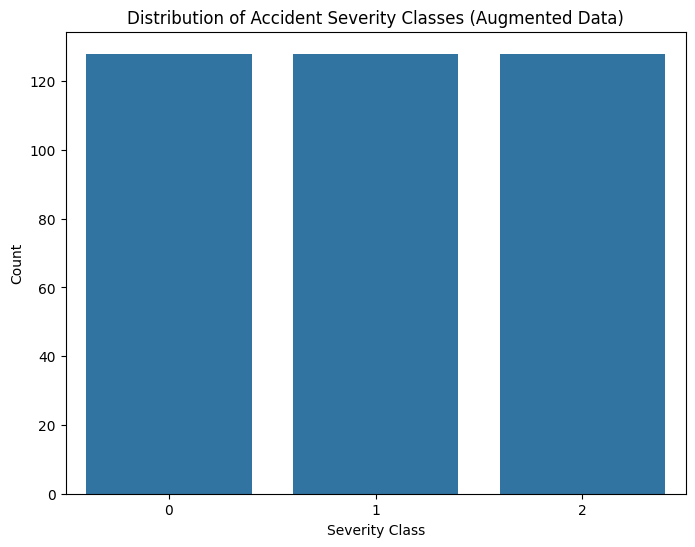

In [63]:
## 0: No casualties (minor) - This category is assigned when the total number of injuries and casualties is 0.
## 1: Minor injuries - This category is assigned when the total number of injuries and casualties is between 1 and 5 (inclusive).
## 2: Moderate injuries - This category is assigned when the total number of injuries and casualties is between 6 and 10 (inclusive).

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='severity', data=df_augmented)
plt.title('Distribution of Accident Severity Classes (Augmented Data)')
plt.xlabel('Severity Class')
plt.ylabel('Count')
plt.savefig('severity_distribution_barplot.png') # Save the plot
plt.show()

## Visualize relationships between features and severity

### Subtask:
Generate different plots (e.g., bar plots for categorical features, histograms or box plots for numerical features) to explore how other columns relate to the 'severity' level.


**Reasoning**:
Generate different plots to explore the relationship between other columns and the 'severity' level as requested in the instructions.



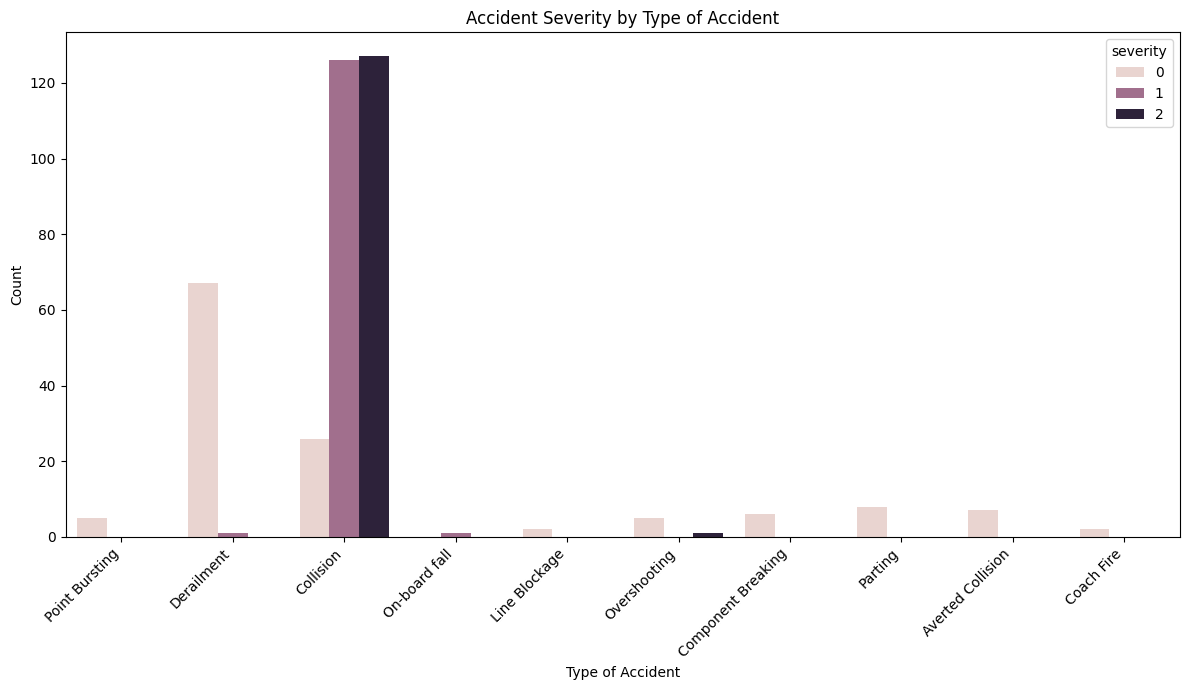

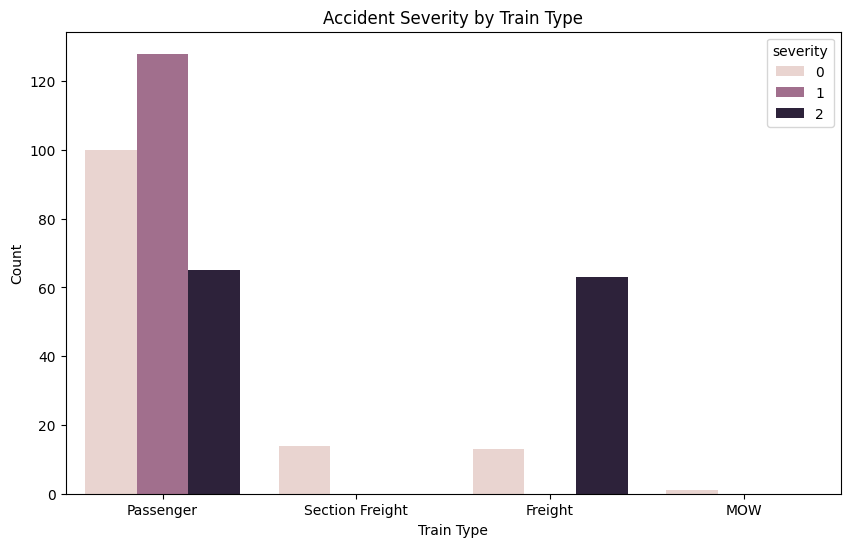

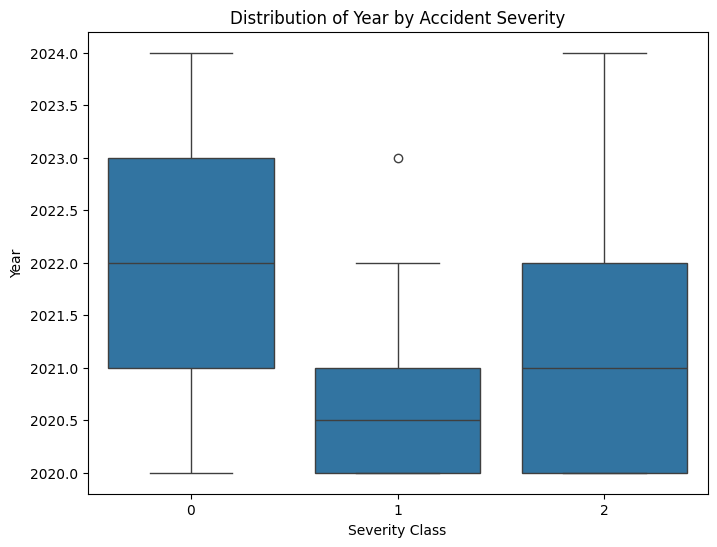

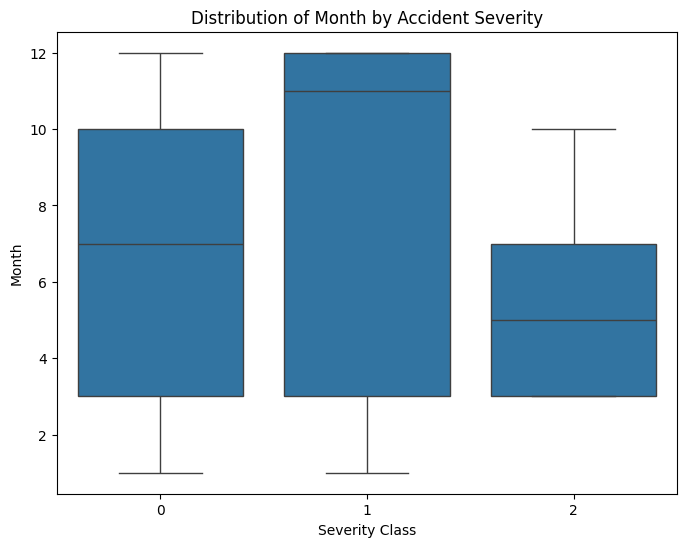

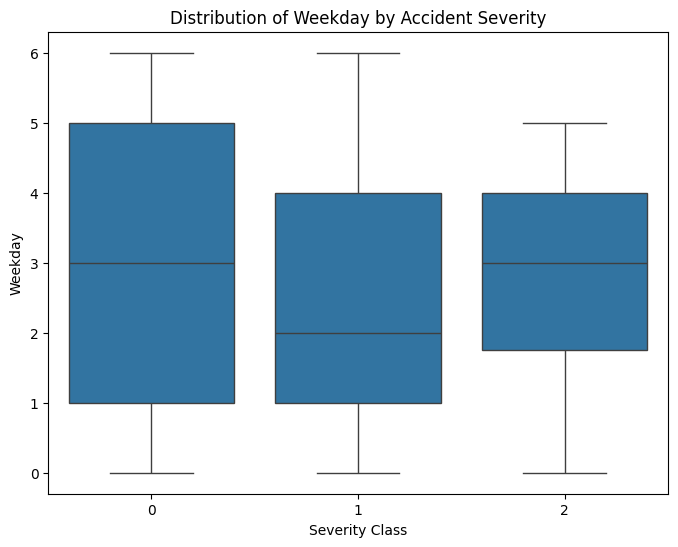

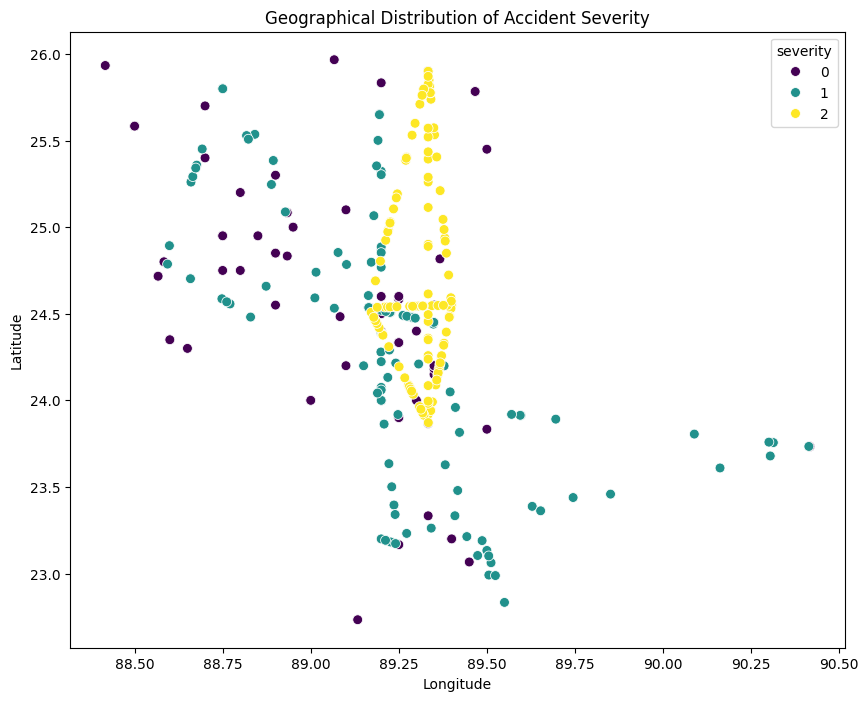

In [64]:
# 1. Relationship between 'Type of Accident' and 'severity'
plt.figure(figsize=(12, 7))
sns.countplot(x='Type of Accident', hue='severity', data=df_augmented)
plt.title('Accident Severity by Type of Accident')
plt.xlabel('Type of Accident')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('accident_type_severity_barplot.png') # Save the plot
plt.show()

# 2. Relationship between 'Train Type' and 'severity'
plt.figure(figsize=(10, 6))
sns.countplot(x='Train Type', hue='severity', data=df_augmented)
plt.title('Accident Severity by Train Type')
plt.xlabel('Train Type')
plt.ylabel('Count')
plt.savefig('train_type_severity_barplot.png') # Save the plot
plt.show()

# 3. Distribution of 'year' across different 'severity' levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='severity', y='year', data=df_augmented)
plt.title('Distribution of Year by Accident Severity')
plt.xlabel('Severity Class')
plt.ylabel('Year')
plt.savefig('year_severity_boxplot.png') # Save the plot
plt.show()

# 4. Distribution of 'month' across different 'severity' levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='severity', y='month', data=df_augmented)
plt.title('Distribution of Month by Accident Severity')
plt.xlabel('Severity Class')
plt.ylabel('Month')
plt.savefig('month_severity_boxplot.png') # Save the plot
plt.show()

# 5. Distribution of 'weekday' across different 'severity' levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='severity', y='weekday', data=df_augmented)
plt.title('Distribution of Weekday by Accident Severity')
plt.xlabel('Severity Class')
plt.ylabel('Weekday')
plt.savefig('weekday_severity_boxplot.png') # Save the plot
plt.show()

# 6. Geographical patterns in severity using 'Lat' and 'Lon'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lon', y='Lat', hue='severity', data=df_augmented, palette='viridis', s=50)
plt.title('Geographical Distribution of Accident Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('geographical_severity_scatterplot.png') # Save the plot
plt.show()

## Create comparison plots

### Subtask:
Generate plots that compare different features against each other, potentially colored or grouped by 'severity'.


**Reasoning**:
Create a scatter plot comparing 'Lat' and 'Lon', colored by 'severity', create a pair plot of 'year', 'month', and 'weekday', with hues set to 'severity', and generate a heatmap of the correlation matrix for numerical features, including 'severity'.



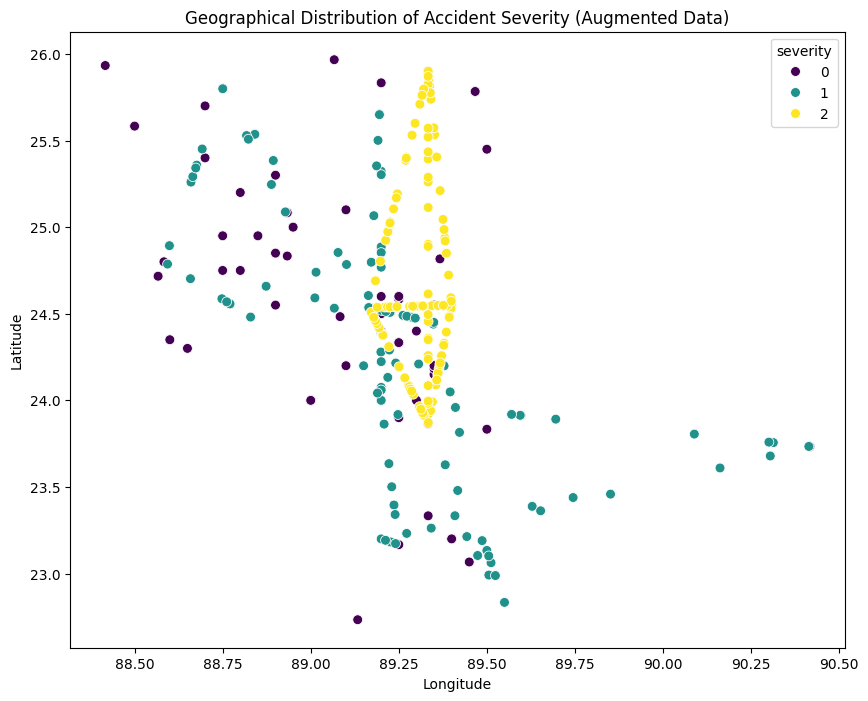

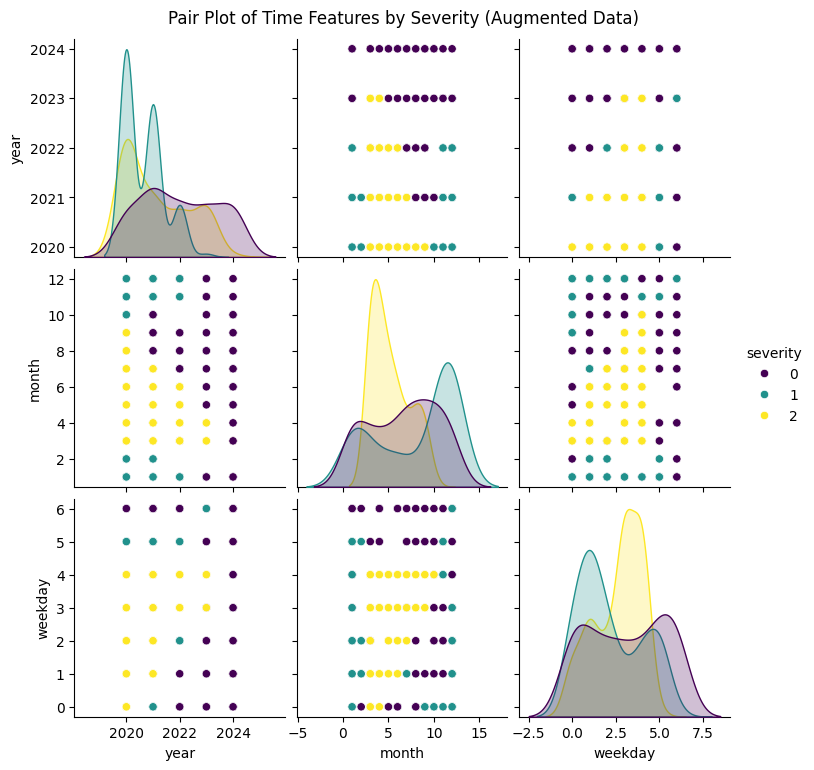

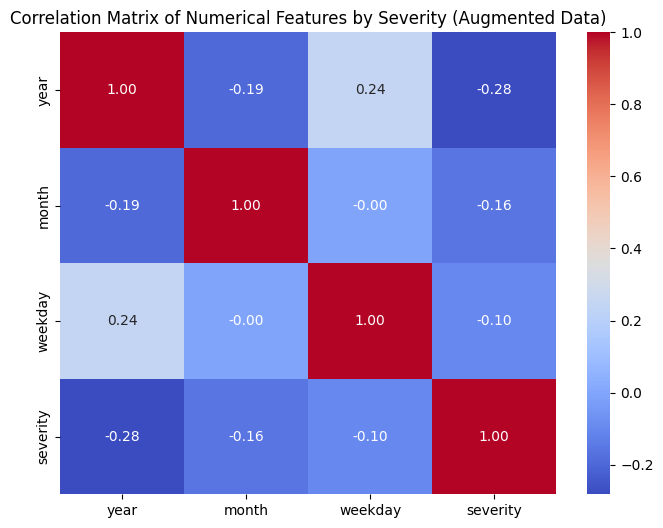

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of Lat vs Lon colored by severity
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lon', y='Lat', hue='severity', data=df_augmented, palette='viridis', s=50)
plt.title('Geographical Distribution of Accident Severity (Augmented Data)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('geo_severity_comparison_scatterplot.png') # Save the plot
plt.show()

# 2. Pair plot of year, month, and weekday with severity hue
numerical_features = ['year', 'month', 'weekday', 'severity']
pair_plot = sns.pairplot(df_augmented[numerical_features], hue='severity', palette='viridis')
pair_plot.fig.suptitle('Pair Plot of Time Features by Severity (Augmented Data)', y=1.02)
pair_plot.savefig('time_features_severity_pairplot.png') # Save the plot
plt.show()

# 3. Heatmap of the correlation matrix for numerical features
correlation_matrix = df_augmented[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features by Severity (Augmented Data)')
plt.savefig('numerical_features_correlation_heatmap.png') # Save the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains a mix of categorical and numerical features including 'Lat', 'Lon', 'year', 'month', 'weekday', 'severity', 'Type of Accident', and 'Train Type'.
*   The bar plot of 'severity' distribution shows the counts for each severity class.
*   Visualizations exploring the relationship between features and severity revealed potential correlations, such as varying distributions of 'Type of Accident' and 'Train Type' across different severity levels.
*   Box plots indicated the distribution of 'year', 'month', and 'weekday' for each severity level.
*   A scatter plot of 'Lat' and 'Lon' colored by severity showed the geographical distribution of accidents, highlighting potential spatial patterns.
*   A pair plot of 'year', 'month', and 'weekday' with severity as hue provided pairwise comparisons and distributions.
*   A heatmap of the correlation matrix for numerical features illustrated the linear relationships between 'year', 'month', 'weekday', and 'severity'.

### Insights or Next Steps

*   Further investigation into specific "Type of Accident" and "Train Type" categories is needed to understand why they are associated with particular severity levels.
*   Analyze the geographical distribution patterns more closely to identify high-risk locations that may require targeted safety measures.


In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('Final_augmented_data_acdt.csv')

In [68]:
df.head()

,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,Cause,Error By,year,month,weekday,severity
0,Kurigram,25.7833,89.4667,Point Bursting,422 Down,Passenger,Missing,Missing,Negligence,Human,2020,1,0,0
1,Bohorpur,24.8167,89.3667,Derailment,8 Down,Passenger,Missing,Missing,Defective Component,Mechanical,2020,1,5,0
2,Safdarpur,24.5833,89.2500,Derailment,26 Down,Passenger,Missing,Missing,Trap point Collision,Mechanical,2020,1,6,0
3,Bespur- Narail Banmalipur,23.1333,89.5000,Collision,Bhatiapara Express-2,Passenger,Crossing,Motorcycle,Level Crossing Violation,Human,2020,1,1,1
4,Khulna,22.8333,89.5500,On-board fall,53 Up Betna Express,Passenger,Missing,Missing,Pessenger Negligence,Human,2020,2,5,1


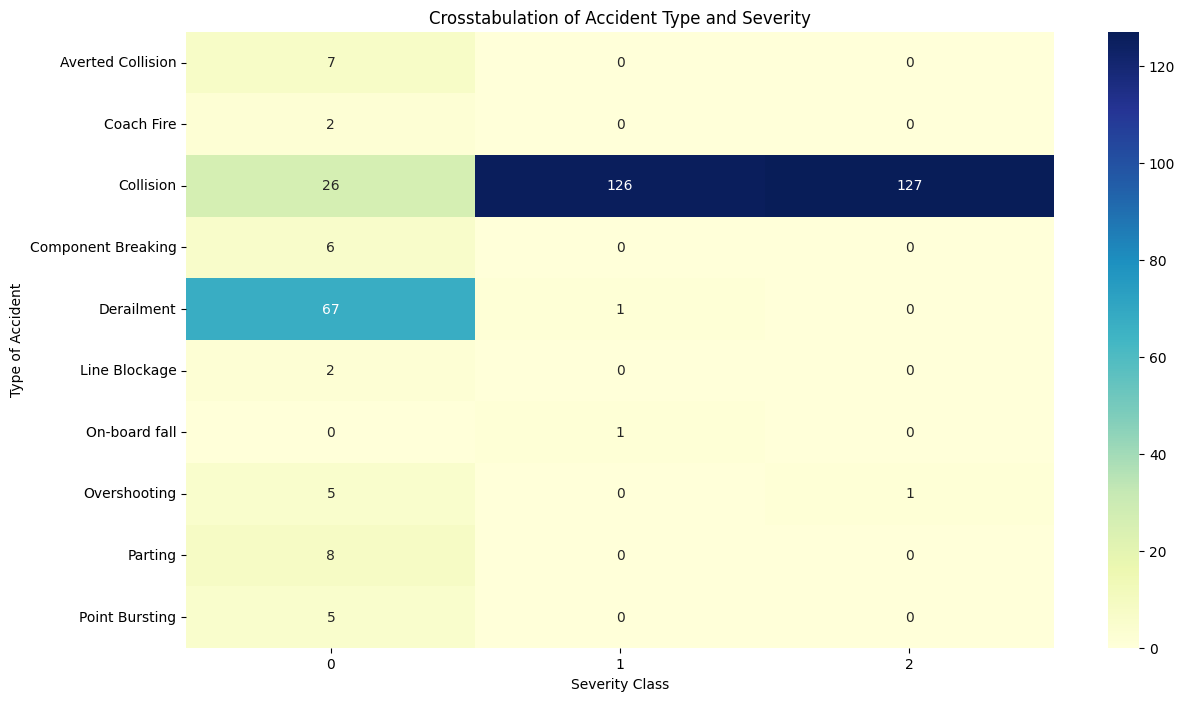

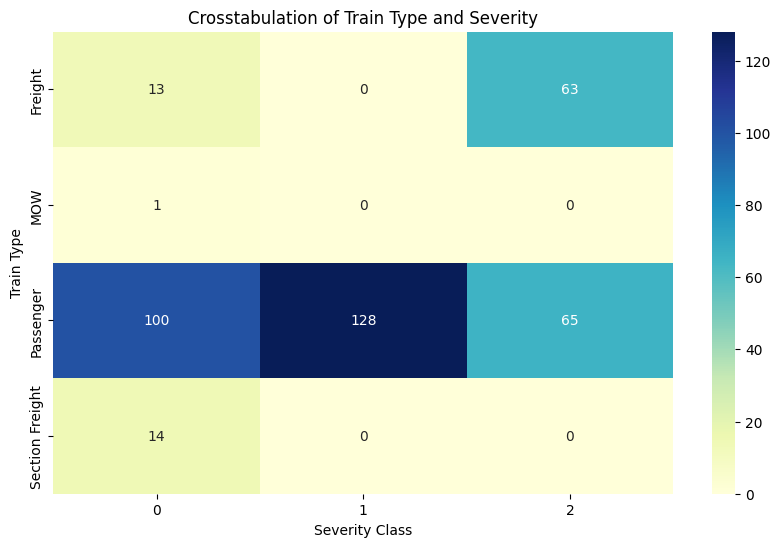

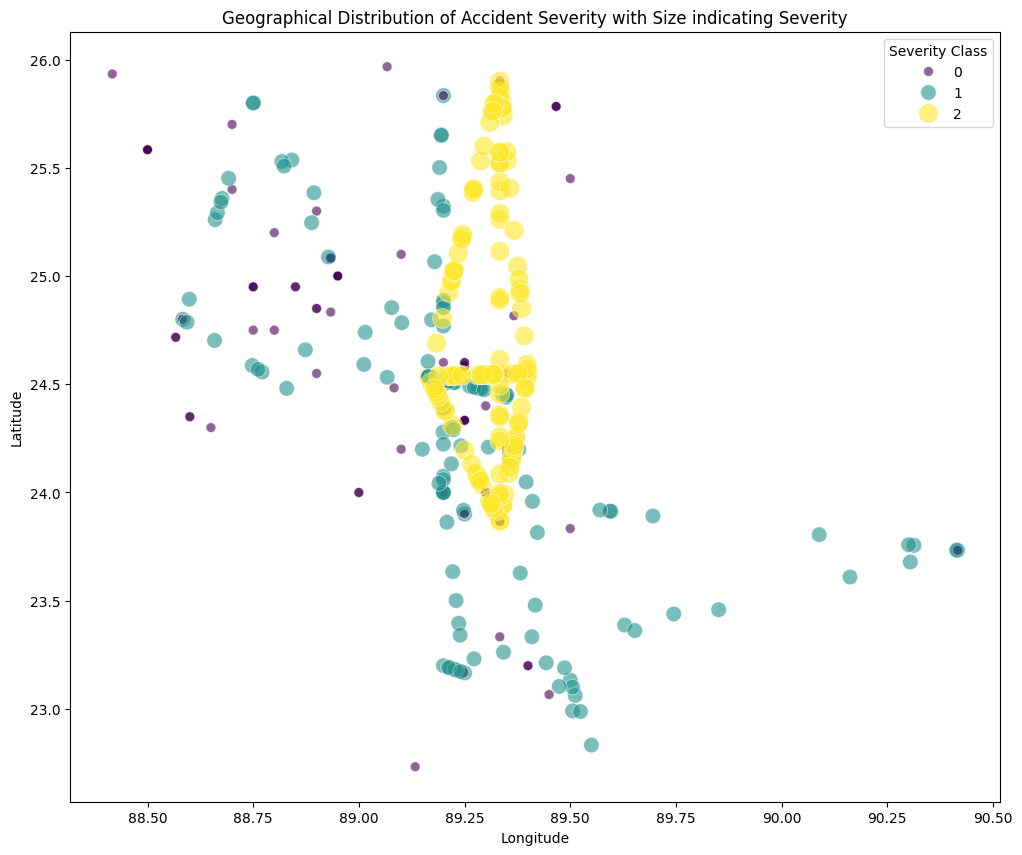

In [69]:
# Further investigation into 'Type of Accident' and 'severity'
plt.figure(figsize=(14, 8))
sns.heatmap(pd.crosstab(df['Type of Accident'], df['severity']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Crosstabulation of Accident Type and Severity')
plt.xlabel('Severity Class')
plt.ylabel('Type of Accident')
plt.savefig('accident_type_severity_heatmap.png')
plt.show()

# Further investigation into 'Train Type' and 'severity'
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Train Type'], df['severity']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Crosstabulation of Train Type and Severity')
plt.xlabel('Severity Class')
plt.ylabel('Train Type')
plt.savefig('train_type_severity_heatmap.png')
plt.show()

# Analyze geographical distribution patterns more closely
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Lon', y='Lat', hue='severity', size='severity', data=df, palette='viridis', sizes=(50, 200), alpha=0.6)
plt.title('Geographical Distribution of Accident Severity with Size indicating Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Severity Class')
plt.savefig('geographical_severity_scatterplot_sized.png')
plt.show()

In [72]:

categorical_cols = ['Station', 'Type of Accident', 'Train Type', 'Collision (Place)',
                    'Collision With', 'Cause', 'Error By']
numerical_cols = ['Lat', 'Lon', 'year', 'month', 'weekday']

for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')


In [73]:
df.tail()

,Station,Lat,Lon,Type of Accident,Name of Train,Train Type,Collision (Place),Collision With,Cause,Error By,year,month,weekday,severity
379,Singiya,25.024171,89.225057,Collision,Missing,Freight,Crossing,Auto,Level Crossing Violation,Human,2022,4,3,2
380,Lalmonirhat,24.479545,89.178891,Collision,Missing,Passenger,Crossing,Auto,Level Crossing Violation,Human,2021,6,3,2
381,Alamdanga- Halsa,25.571360,89.333300,Collision,Missing,Freight,Crossing,Private Car,Level Crossing Violation,Human,2023,4,4,2
382,Singiya,25.761612,89.316197,Collision,Missing,Passenger,Crossing,Private Car,Level Crossing Violation,Human,2023,3,4,2
383,Onnodangor,24.130057,89.266946,Collision,Missing,Passenger,Crossing,Unknown,Level Crossing Violation,Human,2020,8,3,2


In [74]:
# Split features and target
X = df.drop('severity', axis=1)
y = df['severity']

In [75]:
print("\nClass distribution:")
print(y.value_counts())



Class distribution:
severity
0    128
1    128
2    128
Name: count, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [79]:
# Split data with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [80]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 307
Testing set size: 77


In [ ]:
# Define preprocessing pipelines
# For SVM and Logistic Regression: Scale numerical features and encode categorical features

In [81]:
preprocessor_svm_lr = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

In [82]:
preprocessor_svm_lr

ColumnTransformer(transformers=[('cat',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Station', 'Type of Accident', 'Train Type',
                                  'Collision (Place)', 'Collision With',
                                  'Cause', 'Error By']),
                                ('num', StandardScaler(),
                                 ['Lat', 'Lon', 'year', 'month', 'weekday'])])

In [ ]:
# For Random Forest: Encode categorical features but don't scale numerical features

In [83]:
preprocessor_rf = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)
preprocessor_rf

ColumnTransformer(transformers=[('cat',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['Station', 'Type of Accident', 'Train Type',
                                  'Collision (Place)', 'Collision With',
                                  'Cause', 'Error By']),
                                ('num', 'passthrough',
                                 ['Lat', 'Lon', 'year', 'month', 'weekday'])])

In [84]:
# SVM Model with Hyperparameter Tuning
print("\n=== Training SVM Model ===")
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor_svm_lr),
    ('classifier', SVC(class_weight='balanced', random_state=42))
])


=== Training SVM Model ===


In [85]:
# Parameter grid for SVM
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto']
}

In [86]:
# Use Stratified K-Fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
# Grid search with F1 macro as scoring metric
grid_svm = GridSearchCV(
    svm_pipeline,
    param_grid_svm,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Station',
                                                                          'Type '
                                                                          'of '
                                                                          'Accident',
                                                                          'Train '
                                                                          'Type',
                                                                          'Collision '
                                                                          '(Place)',
                                                                          'Collision '
                                                                          'With',
                                                                          'Cause',
                                                                          'Error '
                                                                          'By']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Lat',
                                                                          'Lon',
                                                                          'year',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('classifier',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'rbf']},
             scoring='f1_macro', verbose=1)

In [88]:
# Best parameters and score
print(f"SVM Best Parameters: {grid_svm.best_params_}")
print(f"SVM Best Cross-Validated F1-Macro Score: {grid_svm.best_score_:.4f}")

SVM Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}
SVM Best Cross-Validated F1-Macro Score: 0.8921


In [89]:
# Evaluate on test set
y_pred_svm = grid_svm.predict(X_test)
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test F1-Macro Score: {svm_f1:.4f}")
print(f"SVM Test Accuracy: {svm_acc:.4f}")


SVM Test F1-Macro Score: 0.9208
SVM Test Accuracy: 0.9221


In [90]:

# Classification report for SVM
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       1.00      0.77      0.87        26
           2       1.00      1.00      1.00        26

    accuracy                           0.92        77
   macro avg       0.94      0.92      0.92        77
weighted avg       0.94      0.92      0.92        77



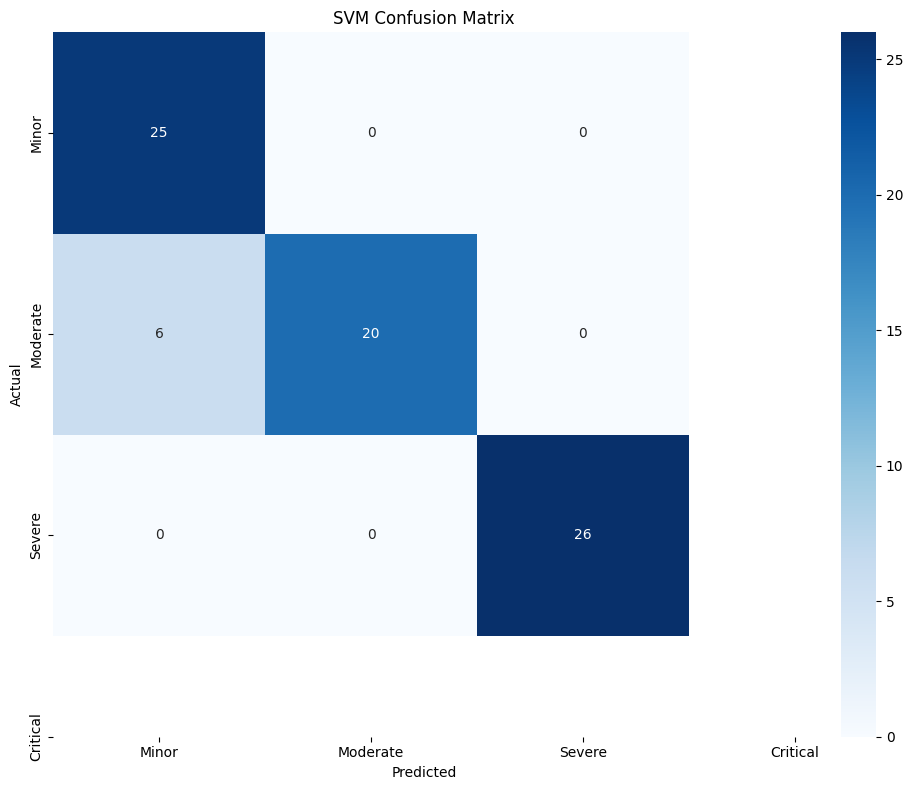

In [91]:

# Confusion matrix for SVM
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred_svm),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Minor', 'Moderate', 'Severe', 'Critical'],
    yticklabels=['Minor', 'Moderate', 'Severe', 'Critical']
)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('svm_confusion_matrix.png')
plt.show()

In [93]:
# Random Forest Model with Hyperparameter Tuning
print("\n=== Training Random Forest Model ===")
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

rf_pipeline


=== Training Random Forest Model ===


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Station',
                                                   'Type of Accident',
                                                   'Train Type',
                                                   'Collision (Place)',
                                                   'Collision With', 'Cause',
                                                   'Error By']),
                                                 ('num', 'passthrough',
                                                  ['Lat', 'Lon', 'year',
                                                   'month', 'weekday'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [94]:
# Parameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [3, 5],
    'classifier__min_samples_split': [2, 5]
}


In [95]:

# Grid search with Stratified K-Fold
grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)
grid_rf.fit(X_train, y_train)

# Best parameters and score
print(f"Random Forest Best Parameters: {grid_rf.best_params_}")
print(f"Random Forest Best Cross-Validated F1-Macro Score: {grid_rf.best_score_:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Random Forest Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Random Forest Best Cross-Validated F1-Macro Score: 0.9147


In [96]:

# Evaluate on test set
y_pred_rf = grid_rf.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test F1-Macro Score: {rf_f1:.4f}")
print(f"Random Forest Test Accuracy: {rf_acc:.4f}")


Random Forest Test F1-Macro Score: 0.9225
Random Forest Test Accuracy: 0.9221


In [97]:

# Classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.83      0.96      0.89        26
           2       0.96      0.96      0.96        26

    accuracy                           0.92        77
   macro avg       0.93      0.92      0.92        77
weighted avg       0.93      0.92      0.92        77



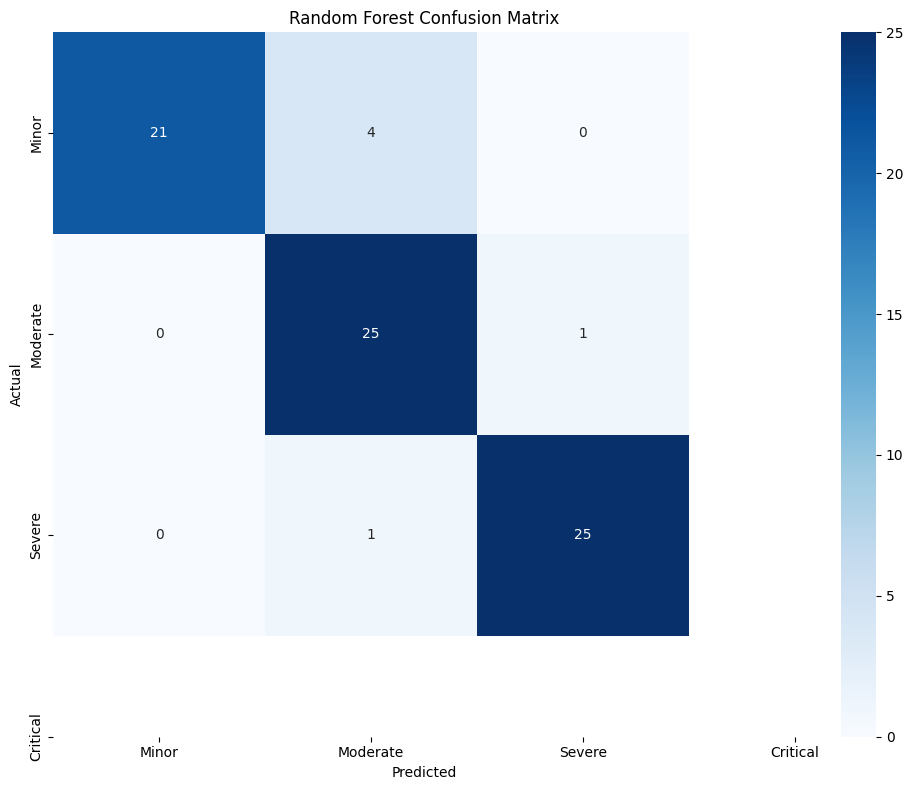

In [98]:

# Confusion matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Minor', 'Moderate', 'Severe', 'Critical'],
    yticklabels=['Minor', 'Moderate', 'Severe', 'Critical']
)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png')
plt.show()

In [99]:
# 9. Logistic Regression Model with Hyperparameter Tuning
print("\n=== Training Logistic Regression Model ===")
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_svm_lr),  # Same as SVM for scaling
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_pipeline



=== Training Logistic Regression Model ===


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Station',
                                                   'Type of Accident',
                                                   'Train Type',
                                                   'Collision (Place)',
                                                   'Collision With', 'Cause',
                                                   'Error By']),
                                                 ('num', StandardScaler(),
                                                  ['Lat', 'Lon', 'year',
                                                   'month', 'weekday'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [100]:
# Parameter grid for Logistic Regression
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__class_weight': ['balanced']
}


In [101]:

# Grid search with Stratified K-Fold
grid_lr = GridSearchCV(
    lr_pipeline,
    param_grid_lr,
    cv=skf,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)
grid_lr.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Station',
                                                                          'Type '
                                                                          'of '
                                                                          'Accident',
                                                                          'Train '
                                                                          'Type',
                                                                          'Collision '
                                                                          '(Place)',
                                                                          'Collision '
                                                                          'With',
                                                                          'Cause',
                                                                          'Error '
                                                                          'By']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Lat',
                                                                          'Lon',
                                                                          'year',
                                                                          'month',
                                                                          'weekday'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__class_weight': ['balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='f1_macro', verbose=1)

In [102]:

# Best parameters and score
print(f"Logistic Regression Best Parameters: {grid_lr.best_params_}")
print(f"Logistic Regression Best Cross-Validated F1-Macro Score: {grid_lr.best_score_:.4f}")


Logistic Regression Best Parameters: {'classifier__C': 10, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Logistic Regression Best Cross-Validated F1-Macro Score: 0.7777


In [103]:

# Evaluate on test set
y_pred_lr = grid_lr.predict(X_test)
lr_f1 = f1_score(y_test, y_pred_lr, average='macro')
lr_acc = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test F1-Macro Score: {lr_f1:.4f}")
print(f"Logistic Regression Test Accuracy: {lr_acc:.4f}")


Logistic Regression Test F1-Macro Score: 0.7631
Logistic Regression Test Accuracy: 0.7662


In [104]:

# Classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.71      0.92      0.80        26
           2       0.76      0.73      0.75        26

    accuracy                           0.77        77
   macro avg       0.78      0.76      0.76        77
weighted avg       0.78      0.77      0.76        77



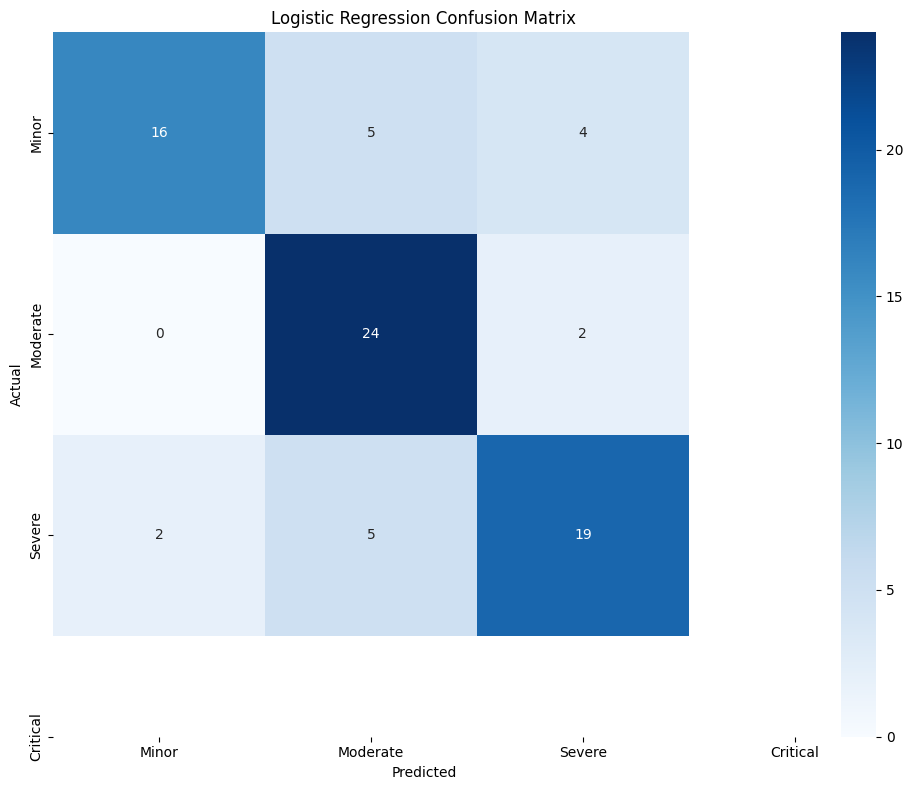

In [105]:

# Confusion matrix for Logistic Regression
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred_lr),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Minor', 'Moderate', 'Severe', 'Critical'],
    yticklabels=['Minor', 'Moderate', 'Severe', 'Critical']
)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('lr_confusion_matrix.png')
plt.show()

In [113]:
# Feature Importance for Random Forest (since SVM and LR don't have direct feature importance)
# Get feature names after preprocessing
# Fit the preprocessor to the training data
preprocessor_rf.fit(X_train, y_train)

cat_encoder = preprocessor_rf.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([cat_feature_names, numerical_cols])


In [114]:

# Get feature importances from the trained Random Forest model
# The Random Forest model is stored in grid_rf.best_estimator_
rf_feature_importances = grid_rf.best_estimator_.named_steps['classifier'].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': rf_feature_importances
})


In [115]:

# Sort by importance and display
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
print("\nRandom Forest Feature Importances:")
display(feature_importance_df)



Random Forest Feature Importances:


,feature,importance
1,Type of Accident,0.235977
8,Lon,0.145620
4,Collision With,0.110092
10,month,0.101974
0,Station,0.097930
2,Train Type,0.080039
7,Lat,0.062283
3,Collision (Place),0.058227
11,weekday,0.030158
5,Cause,0.028033


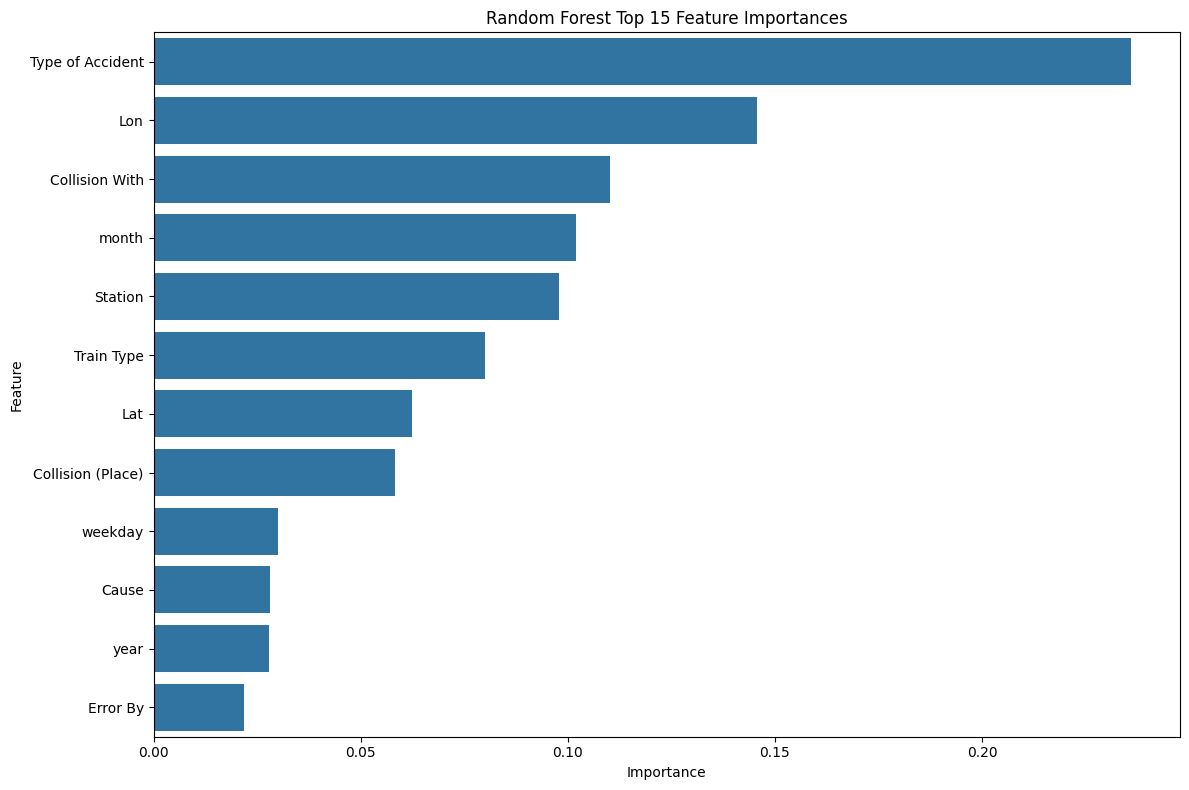

In [117]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15)) # Display top 15 for clarity
plt.title('Random Forest Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.show()

In [118]:
# 11. Save all models for deployment
joblib.dump(grid_svm, 'svm_severity_model.pkl')
joblib.dump(grid_rf, 'rf_severity_model.pkl')
joblib.dump(grid_lr, 'lr_severity_model.pkl')
print("\nAll models saved for deployment")


All models saved for deployment


In [119]:
print("\nModel Comparison:")
print(f"SVM F1-Macro: {svm_f1:.4f}")
print(f"Logistic Regression F1-Macro: {lr_f1:.4f}")
print(f"Random Forest F1-Macro: {rf_f1:.4f}")


Model Comparison:
SVM F1-Macro: 0.9208
Logistic Regression F1-Macro: 0.7631
Random Forest F1-Macro: 0.9225


In [120]:
if lr_f1 > svm_f1 and lr_f1 > rf_f1:
    print("Logistic Regression performs best for this dataset")
elif svm_f1 > lr_f1 and svm_f1 > rf_f1:
    print("SVM performs best for this dataset")
else:
    print("Random Forest performs best for this dataset")

Random Forest performs best for this dataset


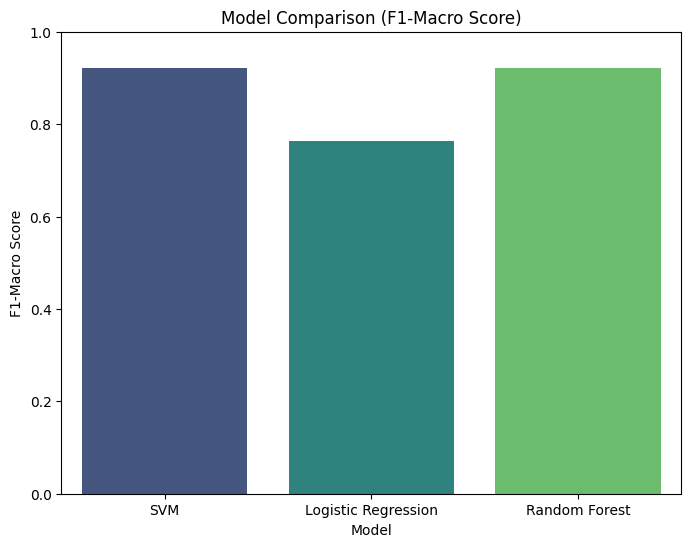

In [121]:
# Model Comparison Plot
model_names = ['SVM', 'Logistic Regression', 'Random Forest']
f1_scores = [svm_f1, lr_f1, rf_f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=f1_scores, palette='viridis')
plt.title('Model Comparison (F1-Macro Score)')
plt.xlabel('Model')
plt.ylabel('F1-Macro Score')
plt.ylim(0, 1)
plt.savefig('model_comparison_f1_macro.png')
plt.show()

In [123]:
# Load the best performing model (Random Forest)
best_model = joblib.load('rf_severity_model.pkl')

def predict_severity(input_data, model, categorical_cols, numerical_cols):
    """
    Predicts the accident severity using the trained model.

    Args:
        input_data (dict): A dictionary containing the input features
                           for a single accident.
        model: The trained model pipeline.
        categorical_cols (list): List of categorical column names.
        numerical_cols (list): List of numerical column names.

    Returns:
        int: The predicted severity class (0, 1, or 2).
    """
    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_data])

    # Ensure all expected columns are present and in the correct order
    # This is important because the preprocessor expects columns in a specific order
    all_cols = categorical_cols + numerical_cols
    for col in all_cols:
        if col not in input_df.columns:
            input_df[col] = None # Or some appropriate default/placeholder

    # Reorder columns to match the training data order
    input_df = input_df[all_cols]

    # Preprocess the input data using the model's preprocessor
    # The model pipeline handles the preprocessing internally, so we can just predict
    prediction = model.predict(input_df)

    return prediction[0]

# Take input from the user
print("Please enter the details for the accident:")

user_input = {}
for col in categorical_cols:
    user_input[col] = input(f"Enter value for {col}: ")

for col in numerical_cols:
    while True:
        try:
            user_input[col] = float(input(f"Enter value for {col} (numeric): "))
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")


# Make a prediction using user input
predicted_severity = predict_severity(user_input, best_model, categorical_cols, numerical_cols)

print(f"\nUser Input Data: {user_input}")
print(f"Predicted Severity Class: {predicted_severity}")

# Interpret the predicted severity class
severity_mapping = {
    0: 'Minor (No casualties)',
    1: 'Minor Injuries (1-5 casualties)',
    2: 'Moderate Injuries (>5 casualties)',
}

print(f"Interpreted Predicted Severity: {severity_mapping.get(predicted_severity, 'Unknown Severity')}")

Please enter the details for the accident:


KeyboardInterrupt: Interrupted by user

In [ ]:
## Explainability

In [124]:
import joblib
import shap

In [139]:
# Load your saved model
grid_search_model = joblib.load('rf_severity_model.pkl')

# Extract the best estimator (the trained pipeline) from the GridSearchCV object
best_pipeline = grid_search_model.best_estimator_

# Extract the preprocessor and model from the best pipeline
preprocessor = best_pipeline.named_steps['preprocessor']
rf_model = best_pipeline.named_steps['classifier']

# Get feature names after preprocessing
# This is crucial for creating meaningful explanations
cat_encoder = preprocessor.named_transformers_['cat']
# Use the original categorical_cols list that the encoder was fitted on
cat_feature_names = cat_encoder.get_feature_names_out(categorical_cols)
numerical_features = ['Lat', 'Lon', 'year', 'month', 'weekday']
all_feature_names = np.concatenate([cat_feature_names, numerical_features])

# Now we need a sample of data to explain
# For this, we'll load your original augmented data
df = pd.read_csv('Final_augmented_data_acdt.csv')
X = df.drop('severity', axis=1)

# Apply the same preprocessing to get the transformed data
X_transformed = preprocessor.transform(X)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_transformed)

<Figure size 1200x1000 with 0 Axes>

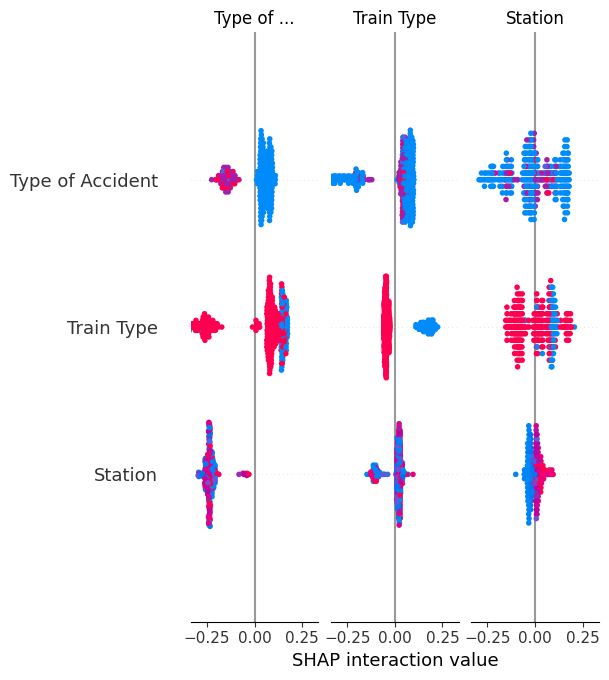

<Figure size 640x480 with 0 Axes>

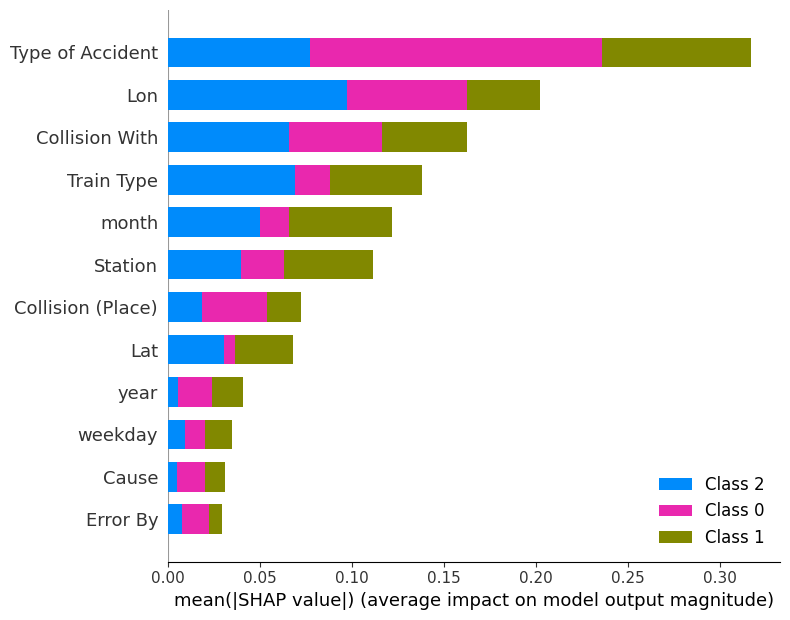

<Figure size 640x480 with 0 Axes>

In [140]:
# Generate SHAP summary plot for global interpretation
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_transformed, feature_names=all_feature_names)
plt.tight_layout()
plt.savefig('global_shap_summary.png')
plt.show()

# Create a bar plot of average absolute SHAP values
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_transformed, feature_names=all_feature_names, plot_type="bar")
plt.tight_layout()
plt.savefig('shap_bar_plot.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

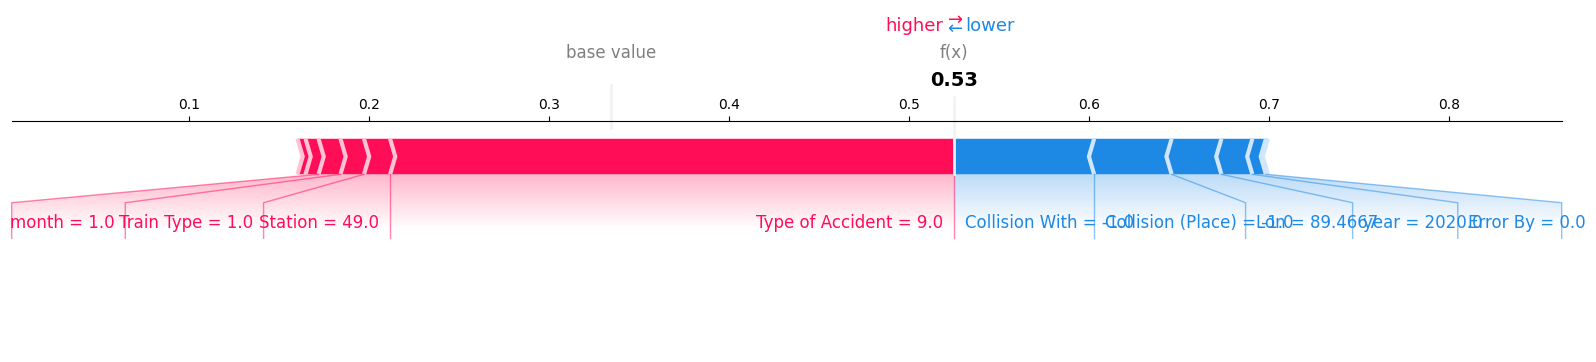

<Figure size 1200x600 with 0 Axes>

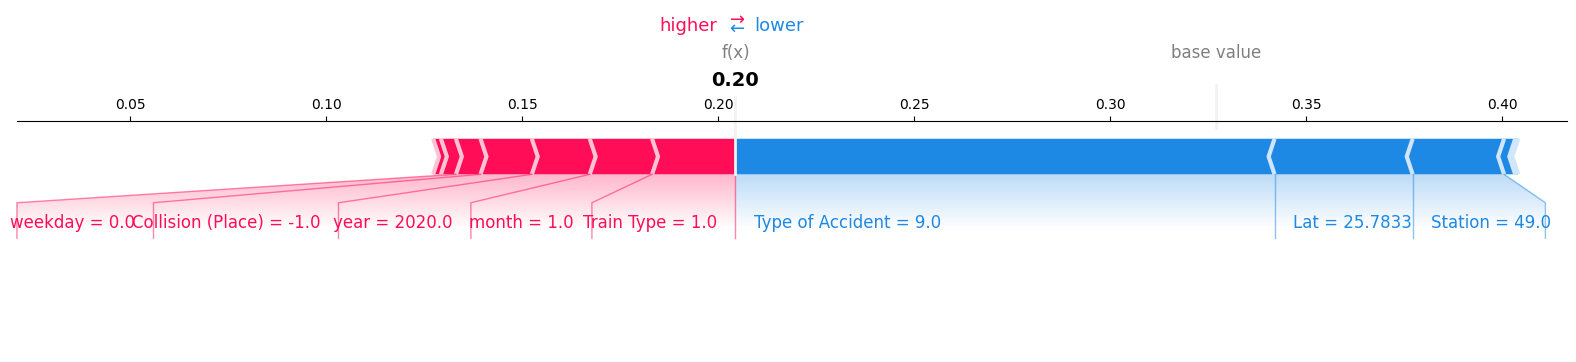

<Figure size 1200x600 with 0 Axes>

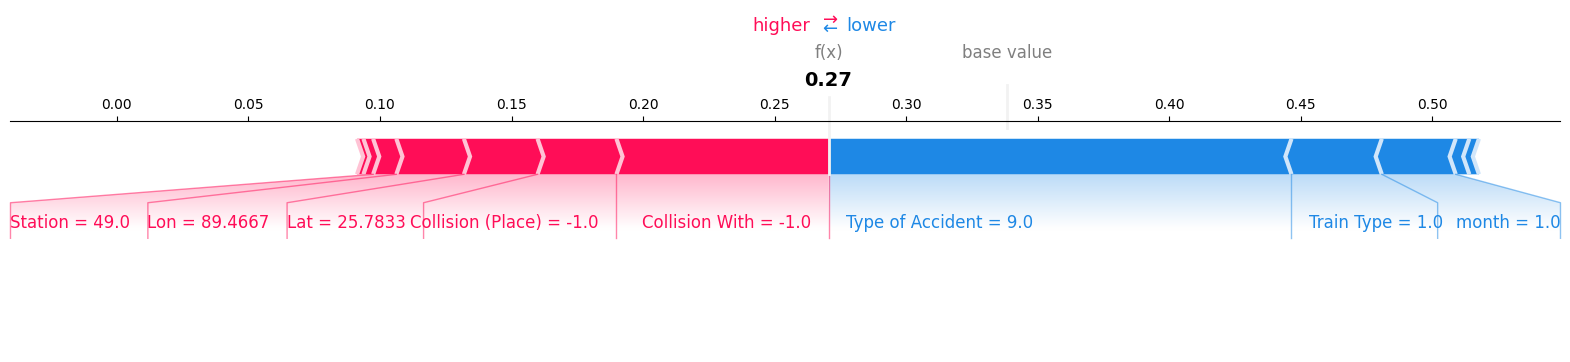

<Figure size 1200x600 with 0 Axes>

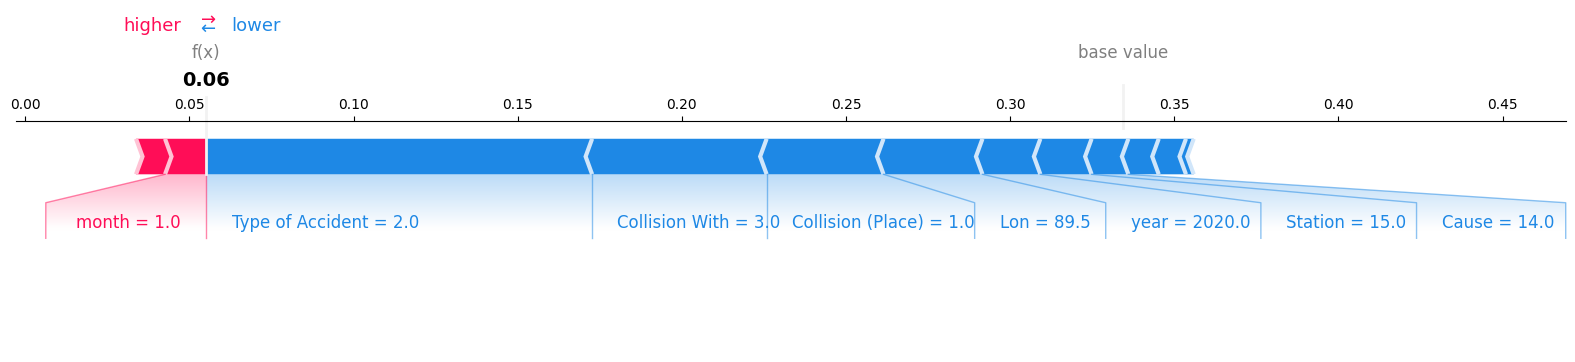

<Figure size 1200x600 with 0 Axes>

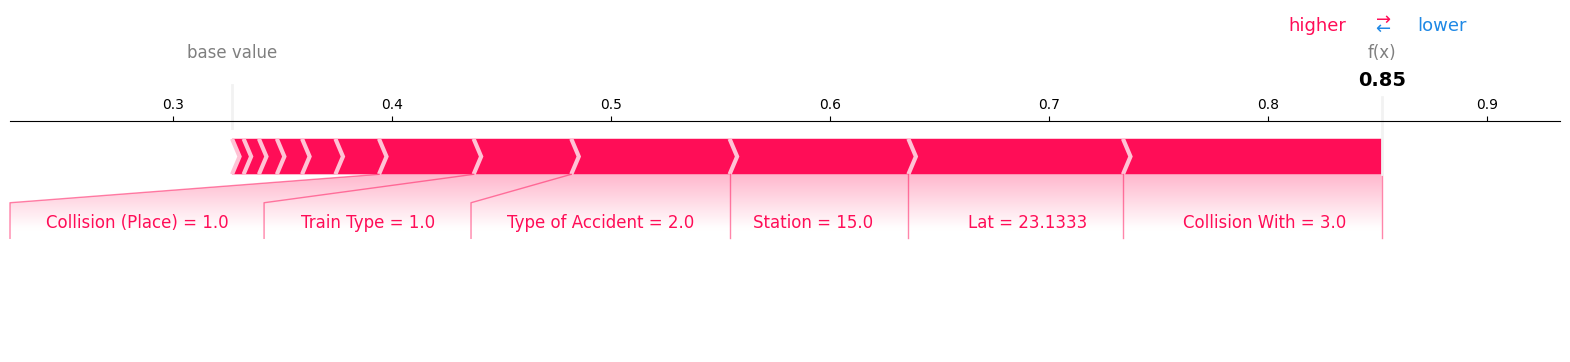

<Figure size 1200x600 with 0 Axes>

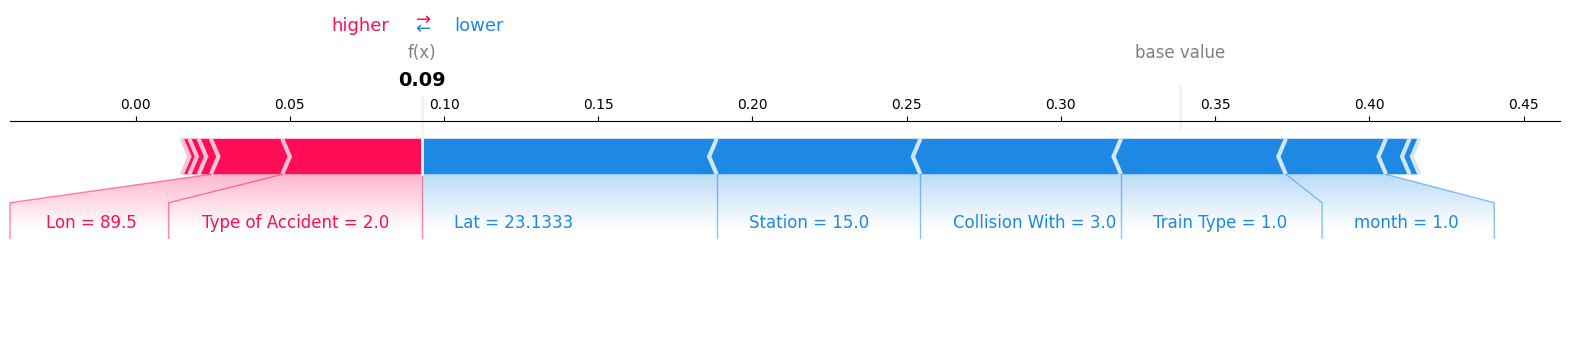

<Figure size 1200x600 with 0 Axes>

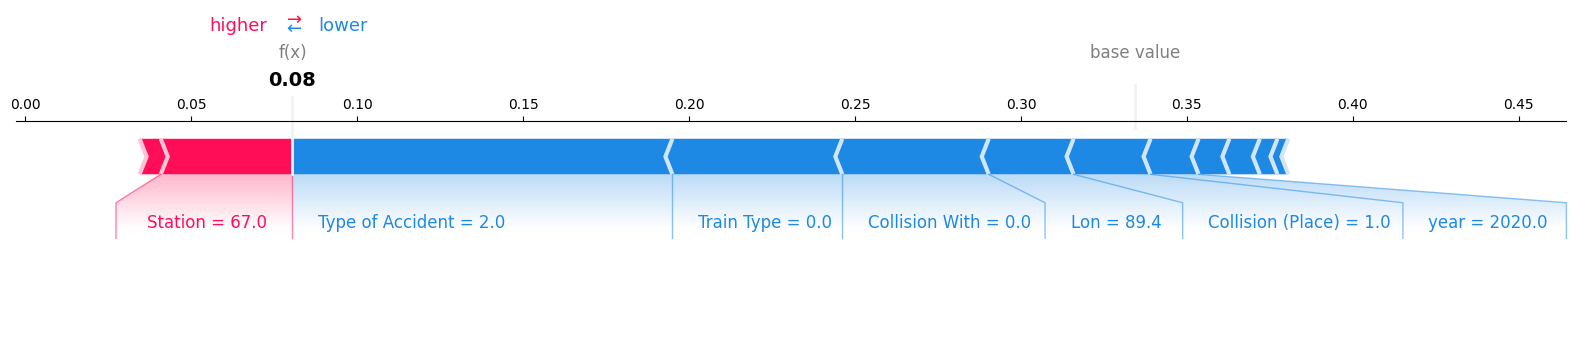

<Figure size 1200x600 with 0 Axes>

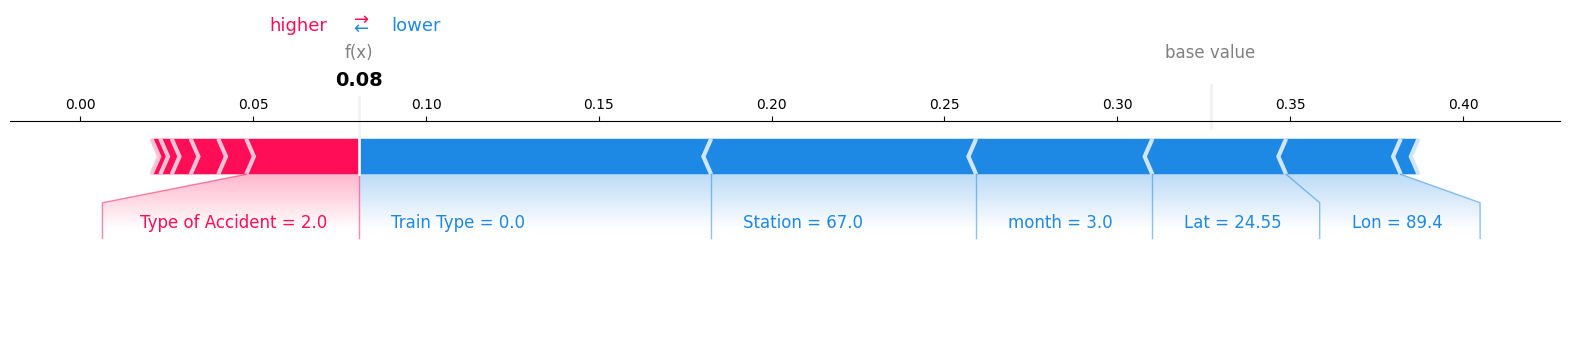

<Figure size 1200x600 with 0 Axes>

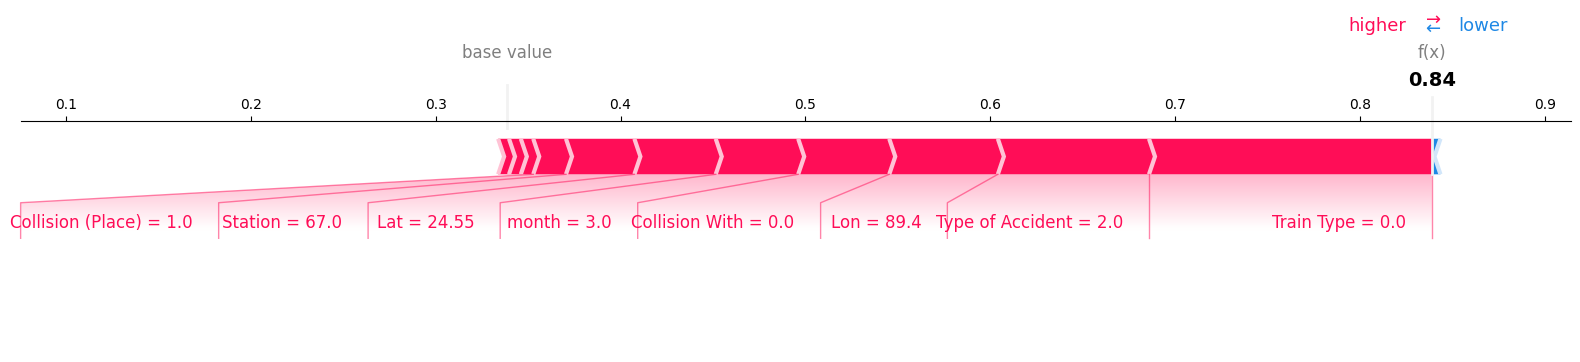

In [142]:
# Select some representative examples from different severity levels
# We'll get one example from each severity class
severe_examples = []
for severity_class in [0, 1, 2]:
    class_examples = X[df['severity'] == severity_class]
    if len(class_examples) > 0:
        severe_examples.append(class_examples.iloc[0])

# For each example, generate a force plot
for i, example in enumerate(severe_examples):
    # Transform the example
    example_transformed = preprocessor.transform(pd.DataFrame([example]))

    # Generate SHAP values for this example
    shap_values_example = explainer(example_transformed)

    # Create a force plot for each class
    for severity_class in [0, 1, 2]:
        if severity_class < shap_values_example.values.shape[1]: # Check if the class index is valid
            plt.figure(figsize=(12, 6))
            shap.force_plot(
                explainer.expected_value[severity_class], # Select expected value for the class
                shap_values_example.values[0, :, severity_class], # Select SHAP values for the instance and class
                features=example_transformed[0, :], # Feature values for the instance
                feature_names=all_feature_names,
                matplotlib=True
            )
            plt.title(f'Severity Class {severity_class} Explanation for Example {i+1}')
            plt.tight_layout()
            plt.savefig(f'severity_{severity_class}_force_plot_example_{i+1}.png')
            plt.close()

In [170]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# First, ensure you have the original data before preprocessing
# (This is critical for categorical features)
X_original = df.drop('severity', axis=1)


In [171]:
!pip install pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.3 MB/s eta 0:00:00
